In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install scikit-plot

In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scikitplot as skplt
from keras.layers.convolutional import Convolution2D
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:

df = pd.read_csv('/content/drive/MyDrive/liver/archive (4).zip (Unzipped Files)/Liver Patient Dataset (LPD)_train.csv', encoding= 'unicode_escape')
df.head(5)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [7]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.isnull()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
30686,False,False,False,False,False,False,False,False,False,False,False
30687,False,False,False,False,False,False,False,False,False,False,False
30688,False,False,False,False,False,False,False,False,False,False,False
30689,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

Number of patients diagnosed with liver disease:  21917
Number of patients not diagnosed with liver disease:  8774


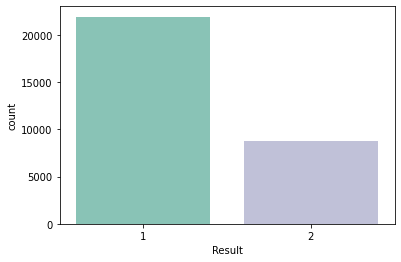

In [10]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=df, x = 'Result', label='Count',palette= ["#7fcdbb","#bcbddc"])

LD, NLD = df['Result'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  21986
Number of patients that are female:  7803


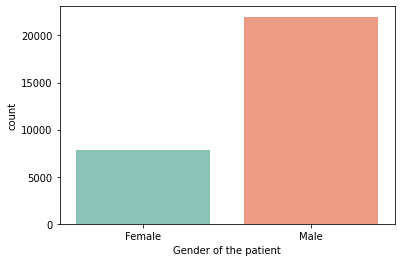

In [11]:
sns.countplot(data=df, x = 'Gender of the patient', label='Count', palette= ["#7fcdbb", "#fc9272"])

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [12]:
#Mean Age of Patiens
df[['Gender of the patient', 'Result','Age of the patient']].groupby(['Result','Gender of the patient'], as_index=False).mean().sort_values(by='Result', ascending=False)

,Result,Gender of the patient,Age of the patient
2,2,Female,43.068889
3,2,Male,44.309737
0,1,Female,43.291014
1,1,Male,44.502097


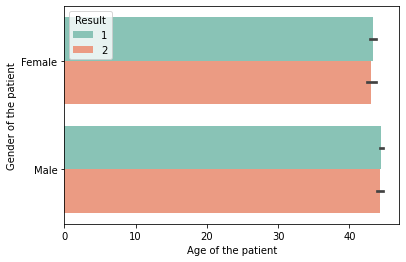

In [13]:
# Plotting patient Age vs Gender
sns.barplot(x="Age of the patient", y="Gender of the patient", hue="Result", data=df, palette= ["#7fcdbb", "#fc9272"])

Text(0.5, 0.98, 'Liver Disease by Gender and Age')

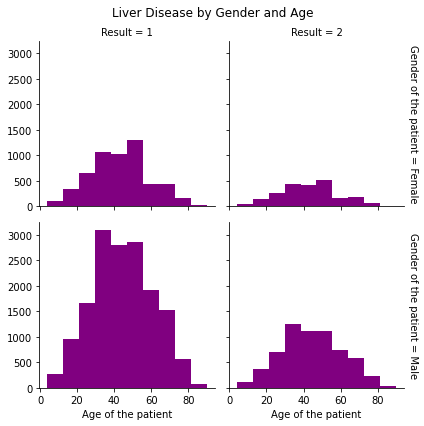

In [14]:
# Plotting Age vs Gender
g = sns.FacetGrid(df, col="Result", row="Gender of the patient", margin_titles=True)
g.map(plt.hist, "Age of the patient", color="purple")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Liver Disease by Gender and Age')

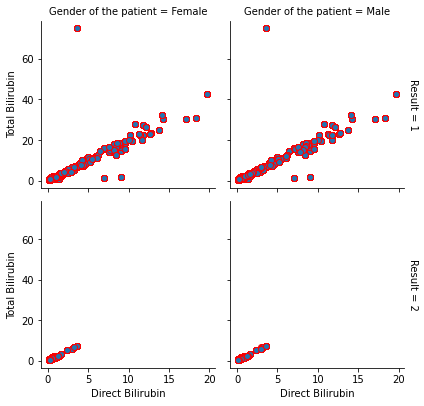

In [15]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(df, col="Gender of the patient", row="Result", margin_titles=True)
g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="r")
plt.subplots_adjust(top=0.9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


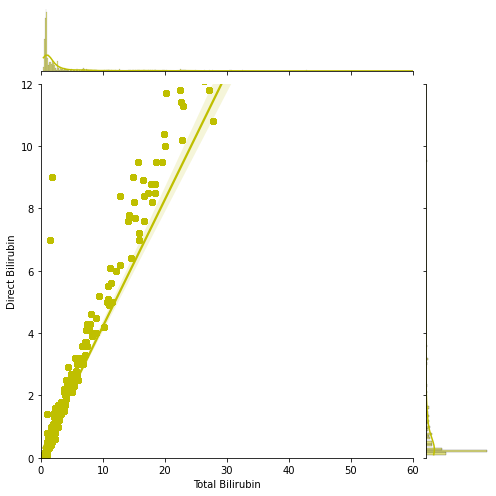

In [16]:
# Plotting Total_Bilirubin vs Direct_Bilirubin
color = sns.color_palette()[5]


sns.jointplot("Total Bilirubin", "Direct Bilirubin", data=df, kind="reg",xlim=(0, 60), ylim=(0, 12), color='y', size=7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


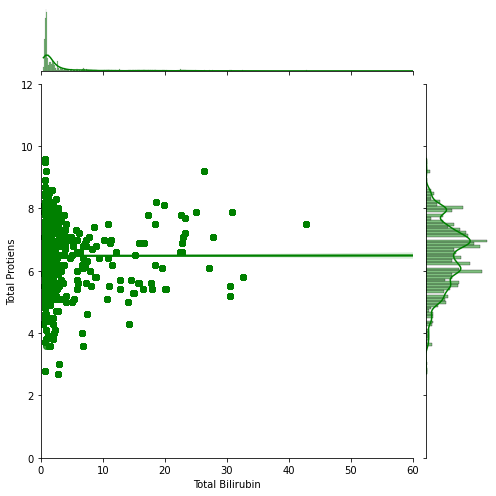

In [17]:
# Plotting Total_Bilirubin vs Total Protiens
color = sns.color_palette()[5]


sns.jointplot("Total Bilirubin", "Total Protiens", data=df, kind="reg",xlim=(0, 60), ylim=(0, 12), color='g', size=7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


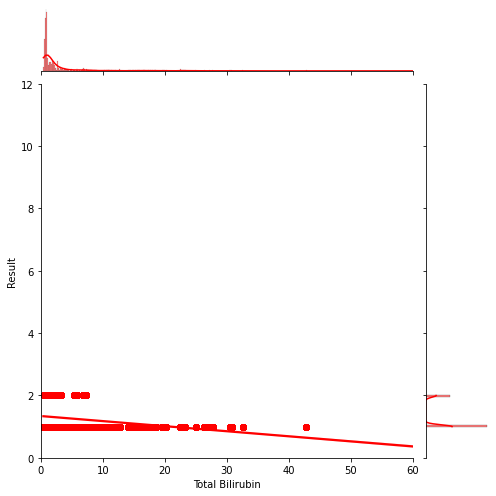

In [18]:
# Plotting Total_Bilirubin vs Result
color = sns.color_palette()[5]


sns.jointplot("Total Bilirubin", "Result", data=df, kind="reg",xlim=(0, 60), ylim=(0, 12), color='r', size=7)

In [19]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [20]:
df.head(3)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1


In [21]:
pd.get_dummies(df['Gender of the patient'], prefix = 'Gender of the patient').head()

,Gender of the patient_Female,Gender of the patient_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
# Concatination
df = pd.concat([df,pd.get_dummies(df['Gender of the patient'], prefix = 'Gender of the patient')], axis=1)

In [23]:
df[df['A/G Ratio Albumin and Globulin Ratio'].isnull()]

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
209,45.0,Female,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,1,0
241,51.0,Male,0.8,0.2,230.0,24.0,46.0,6.5,3.1,NaN,1,0,1
253,35.0,Female,0.6,0.2,180.0,12.0,15.0,5.2,2.7,NaN,2,1,0
312,27.0,Male,1.3,0.6,106.0,25.0,54.0,8.5,4.8,NaN,2,0,1
792,73.0,Male,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30606,50.0,Male,1.2,0.4,160.0,20.0,22.0,NaN,NaN,NaN,2,0,1
30607,70.0,Male,0.6,0.1,196.0,29.0,30.0,NaN,NaN,NaN,1,0,1
30634,33.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,NaN,NaN,1,0,1
30635,65.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,NaN,NaN,1,0,1


In [24]:
X = df.drop(['Gender of the patient','Result'], axis=1)
X.head(3)

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1


In [25]:
y = df['Result']

In [26]:
df_corr = X.corr()
df_corr

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male
Age of the patient,1.000000,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.018056,-0.032162,0.033836
Total Bilirubin,-0.001600,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197978,-0.012446,0.013470
Direct Bilirubin,-0.001521,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.189414,-0.011069,0.010978
Alkphos Alkaline Phosphotase,-0.000761,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.228583,-0.006365,0.009340
Sgpt Alamine Aminotransferase,0.000659,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002433,-0.003460,0.002105
Sgot Aspartate Aminotransferase,0.006104,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066912,0.003971,-0.003812
Total Protiens,-0.007951,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.226314,-0.004995,0.005610
ALB Albumin,-0.015164,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.682759,-0.004001,0.001115
A/G Ratio Albumin and Globulin Ratio,-0.018056,-0.197978,-0.189414,-0.228583,-0.002433,-0.066912,0.226314,0.682759,1.000000,-0.000692,-0.002300
Gender of the patient_Female,-0.032162,-0.012446,-0.011069,-0.006365,-0.003460,0.003971,-0.004995,-0.004001,-0.000692,1.000000,-0.927931


Text(0.5, 1.0, 'Correlation between all the features')

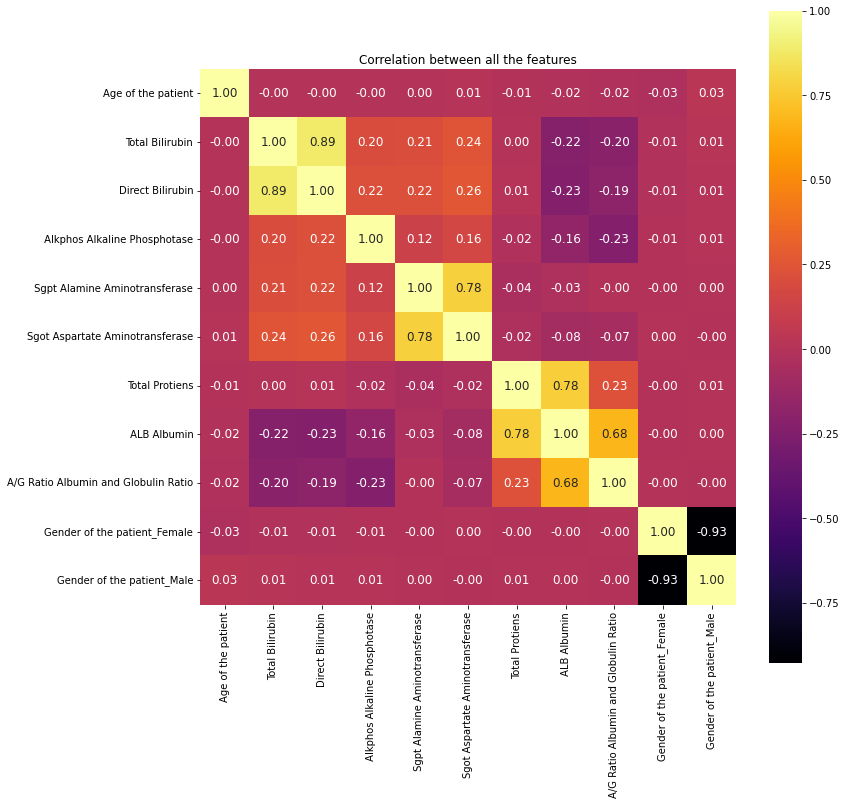

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'inferno')
plt.title('Correlation between all the features')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(24552, 11)
(24552,)
(6139, 11)
(6139,)


In [30]:
df = df.dropna()

In [31]:
y_test = np.nan_to_num(y_test)

In [32]:
X_test = np.nan_to_num(X_test)

In [33]:
X_train = np.nan_to_num(X_train)

In [34]:
y_train = np.nan_to_num(y_train)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


StandardScaler()

In [36]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [43]:

mlp = MLPClassifier(hidden_layer_sizes=(32,16,8,1))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(32, 16, 8, 1))

In [44]:
predictions = mlp.predict(X_test)

In [45]:
print(confusion_matrix(y_test,predictions))

[[4429    0]
 [1710    0]]


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84      4429
           2       0.00      0.00      0.00      1710

    accuracy                           0.72      6139
   macro avg       0.36      0.50      0.42      6139
weighted avg       0.52      0.72      0.60      6139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# compile ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [81]:
# Fitting the data
history =classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
768/768 [==============================] - 2s 2ms/step - loss: -30531456598016.0000 - accuracy: 0.7123
Epoch 2/100
768/768 [==============================] - 2s 2ms/step - loss: -30784287145984.0000 - accuracy: 0.7123
Epoch 3/100
768/768 [==============================] - 2s 2ms/step - loss: -31039407783936.0000 - accuracy: 0.7123
Epoch 4/100
768/768 [==============================] - 2s 2ms/step - loss: -31296185171968.0000 - accuracy: 0.7123
Epoch 5/100
768/768 [==============================] - 2s 2ms/step - loss: -31555231678464.0000 - accuracy: 0.7123
Epoch 6/100
768/768 [==============================] - 2s 2ms/step - loss: -31815953809408.0000 - accuracy: 0.7123
Epoch 7/100
768/768 [==============================] - 2s 2ms/step - loss: -32078162821120.0000 - accuracy: 0.7123
Epoch 8/100
768/768 [==============================] - 2s 2ms/step - loss: -32341277802496.0000 - accuracy: 0.7123
Epoch 9/100
768/768 [==============================] - 2s 2ms/step - loss: -3260

In [82]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


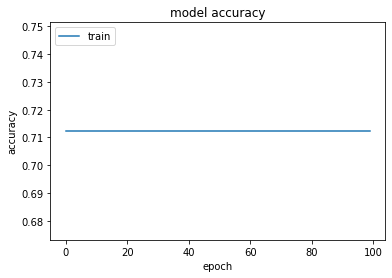

In [84]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

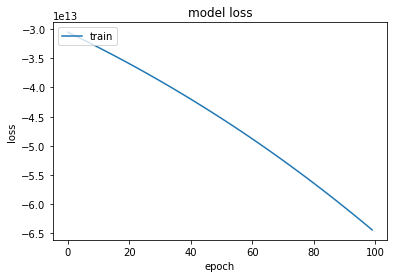

In [86]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84      4429
           2       0.00      0.00      0.00      1710

    accuracy                           0.72      6139
   macro avg       0.36      0.50      0.42      6139
weighted avg       0.52      0.72      0.60      6139



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 720x504 with 0 Axes>

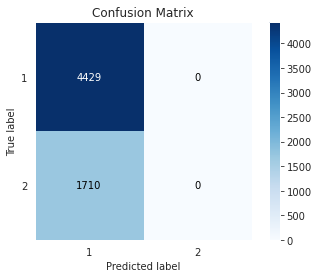

In [101]:
plt.figure(figsize=(10,7))



skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)